<a href="https://colab.research.google.com/github/Sukyeong02/24-1-AI/blob/main/9_CNN_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)


Epoch 1: val_loss improved from inf to 0.05033, saving model to ./model/01-0.0503.hdf5

Epoch 2: val_loss improved from 0.05033 to 0.03789, saving model to ./model/02-0.0379.hdf5

Epoch 3: val_loss improved from 0.03789 to 0.03700, saving model to ./model/03-0.0370.hdf5

Epoch 4: val_loss improved from 0.03700 to 0.03322, saving model to ./model/04-0.0332.hdf5

Epoch 5: val_loss improved from 0.03322 to 0.03063, saving model to ./model/05-0.0306.hdf5

Epoch 6: val_loss improved from 0.03063 to 0.02798, saving model to ./model/06-0.0280.hdf5

Epoch 7: val_loss did not improve from 0.02798

Epoch 8: val_loss did not improve from 0.02798

Epoch 9: val_loss did not improve from 0.02798

Epoch 10: val_loss did not improve from 0.02798

Epoch 11: val_loss did not improve from 0.02798

Epoch 12: val_loss did not improve from 0.02798

Epoch 13: val_loss did not improve from 0.02798

Epoch 14: val_loss did not improve from 0.02798

Epoch 15: val_loss did not improve from 0.02798

Epoch 16: val

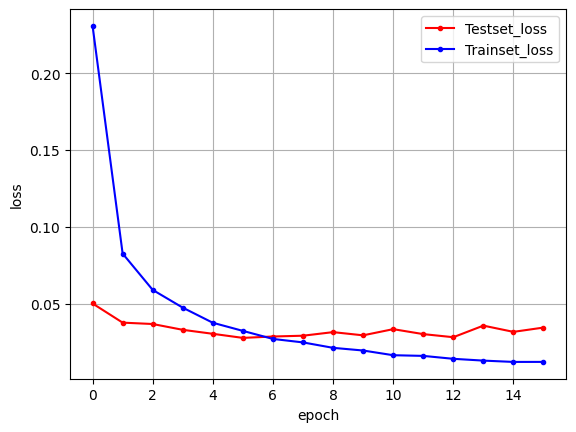

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

y_vloss = history.history['val_loss']

y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()